# Sprint 4
## Tasca M4 T01

### Exercici 1

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)
- Dues variables numèriques (Any o Trimestre i Preu)
- Tres variables (Barri o Districte, Trimestre i Preu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import pandas as pd
import seaborn as sns

!pip install tabulate
from tabulate import tabulate
from IPython.display import display

df1=pd.read_csv('preu_lloguer_per_trimestre_i_barri.csv')
df2=df1[df1['Preu']!='--']
df2["Preu"] = pd.to_numeric(df2["Preu"])
display(df2)
df2.describe().round(2)

<ipython-input-1-75aa03584a3a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Preu"] = pd.to_numeric(df2["Preu"])


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,540.0,540.00,540.00,540.00,540.00
mean,2021.0,2.50,6.19,36.46,442.16
std,0.0,1.12,2.84,21.37,457.36
min,2021.0,1.00,1.00,1.00,6.70
25%,2021.0,2.00,3.00,18.00,12.78
50%,2021.0,2.50,7.00,35.00,232.75
75%,2021.0,4.00,8.00,55.00,815.88
max,2021.0,4.00,10.00,73.00,1816.50


### Una variable categòrica

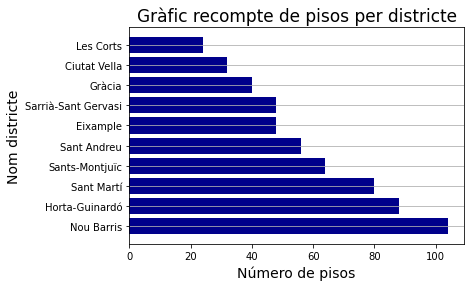

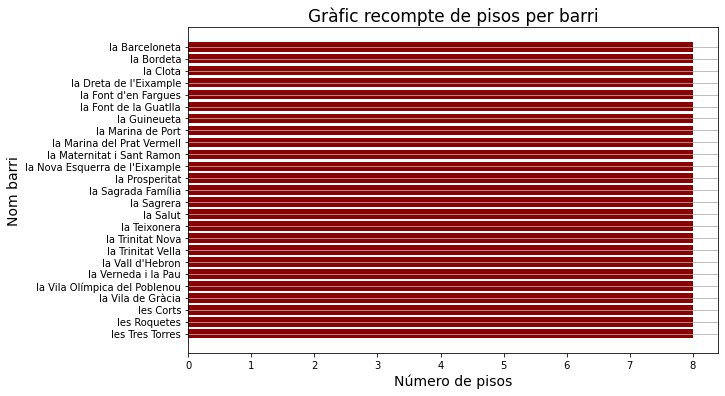

In [2]:
#Recompte districte i barri
x=['Nom_Districte']
y=['Nom_Barri']

Rd=df1[x+y].groupby(by=x).count()
ROD=Rd.sort_values(by=y,ascending=False)
ROD.reset_index(inplace=True)
ROD.index +=1
ROD=ROD.rename(columns={'Nom_Barri':'Recompte_Pisos'})

Rb=df1[x+y].groupby(by=y).count()
ROB=Rb.sort_values(by=y,ascending=False)
ROB.reset_index(inplace=True)
ROB.index +=1
ROB=ROB.rename(columns={'Nom_Districte':'Recompte_Pisos'})

#Gràfic

fig1 = plt.figure(1)
plt.title('Gràfic recompte de pisos per districte', fontsize=17)
plt.rcParams["figure.figsize"] = (9.5,6)
plt.grid(axis='y')
plt.barh(ROD['Nom_Districte'],ROD['Recompte_Pisos'],color='darkblue')
plt.xlabel('Número de pisos', fontsize=14)
plt.ylabel('Nom districte', fontsize=14)
plt.show()

fig2 = plt.figure(2)
plt.title('Gràfic recompte de pisos per barri', fontsize=17)
plt.rcParams["figure.figsize"] = (9.5,6)
plt.grid(axis='y')
plt.barh(ROB['Nom_Barri'].head(25),ROB['Recompte_Pisos'].head(25),color='darkred')
plt.xlabel('Número de pisos', fontsize=14)
plt.ylabel('Nom barri', fontsize=14)
plt.show()

Veiem de la primera gràfica, com en el dataset proporcionat hi ha diferent número de pisos en cada districte. En la segona gràfica podem veure que en el nostre dataset tenim 8 pisos per cada barri i juntant-ho amb la primera gràfica, concloem que hi ha més pisos en els districtes que estàn formats per més barris (i.e. Nou Barris).

### Una variable numèrica

In [3]:
Rp=df2[df2['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)']
columnaP=Rp['Preu']

display(Rp.describe().round(2))
Rp2=df2[df2['Lloguer_mitja']=='Lloguer mitjà per superfície (Euros/m2 mes)']
columnaP2=Rp2['Preu']

display(Rp2.describe().round(2))

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,270.0,270.00,270.00,270.00,270.00
mean,2021.0,2.50,6.19,36.46,871.59
std,0.0,1.12,2.84,21.39,221.19
min,2021.0,1.00,1.00,1.00,447.50
25%,2021.0,2.00,3.25,18.25,742.48
50%,2021.0,2.50,7.00,35.00,816.35
75%,2021.0,3.75,8.00,55.00,934.52
max,2021.0,4.00,10.00,73.00,1816.50


,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,270.0,270.00,270.00,270.00,270.00
mean,2021.0,2.50,6.19,36.46,12.72
std,0.0,1.12,2.84,21.39,1.70
min,2021.0,1.00,1.00,1.00,6.70
25%,2021.0,2.00,3.25,18.25,11.62
50%,2021.0,2.50,7.00,35.00,12.75
75%,2021.0,3.75,8.00,55.00,13.60
max,2021.0,4.00,10.00,73.00,18.00


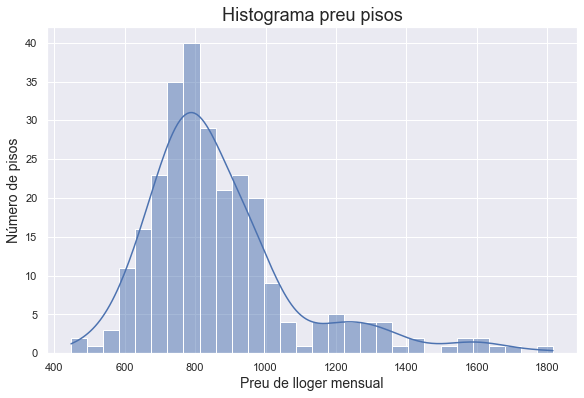

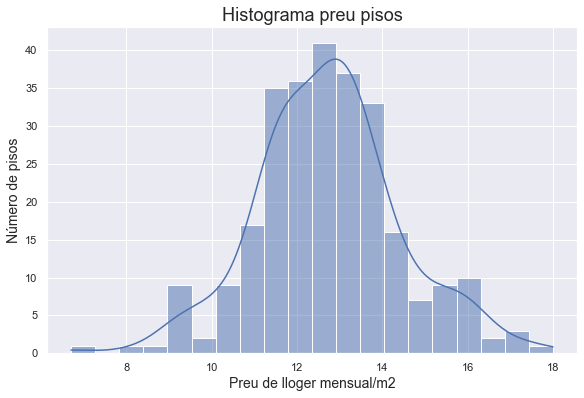

In [4]:
sns.set(style="darkgrid")

fig3 = plt.figure(3)
plt.title('Histograma preu pisos', fontsize=18)
sns.histplot(data= columnaP, kde=True,bins=30)
plt.xlabel("Preu de lloger mensual", fontsize=14)
plt.ylabel("Número de pisos", fontsize=14)
plt.show()

fig4 = plt.figure(4)
plt.title('Histograma preu pisos', fontsize=18)
sns.histplot(data= columnaP2, kde=True,bins=20)
plt.xlabel("Preu de lloger mensual/m2", fontsize=14)
plt.ylabel("Número de pisos", fontsize=14)
plt.show()

S'ha fet una divisió previa per analitzar el preu de lloguer mensual entre preu total i preu/m2. Així podem veure que la majoria de preus de lloguer a Barcelona estàn sobre els 800€ i els 12-13€/m2 mensuals. A més veiem visualment els rangs i la distribució de preus/pisos.

### Una variable numèrica i una categòrica

In [5]:
price_mean_serie=Rp['Preu'].groupby(by=Rp['Nom_Districte']).mean()
Pm= price_mean_serie.to_frame()
Pm=Pm.rename(columns={'Preu':'Preu_mig'})
Pm=Pm.sort_values(by='Preu_mig',ascending=False)
Pm.reset_index(inplace=True)
Pm.index +=1
display(Pm)

pmax=Rp.sort_values(by='Preu',ascending=False)
pmin=Rp.sort_values(by='Preu',ascending=True)
display(pmax[['Nom_Barri','Nom_Districte','Preu','Trimestre']].head(5))
display(pmin[['Nom_Barri','Nom_Districte','Preu','Trimestre']].head(5))

Rp2=Rp2.rename(columns={'Preu':'Preu/m2'})
pmax2=Rp2.sort_values(by='Preu/m2',ascending=False)
pmin2=Rp2.sort_values(by='Preu/m2',ascending=True)

display(pmax2[['Nom_Barri','Nom_Districte','Preu/m2','Trimestre']].head(5))
display(pmin2[['Nom_Barri','Nom_Districte','Preu/m2','Trimestre']].head(5))

,Nom_Districte,Preu_mig
1,Sarrià-Sant Gervasi,1271.212500
2,Les Corts,1214.066667
3,Eixample,1000.545833
4,Sant Martí,916.450000
5,Gràcia,877.265000
6,Ciutat Vella,858.925000
7,Sants-Montjuïc,798.932143
8,Horta-Guinardó,765.007500
9,Sant Andreu,721.196154
10,Nou Barris,664.292500


,Nom_Barri,Nom_Districte,Preu,Trimestre
312,Pedralbes,Les Corts,1816.5,3
166,Pedralbes,Les Corts,1680.3,2
458,Pedralbes,Les Corts,1679.3,4
20,Pedralbes,Les Corts,1598.2,1
461,les Tres Torres,Sarrià-Sant Gervasi,1597.4,4


,Nom_Barri,Nom_Districte,Preu,Trimestre
203,Baró de Viver,Sant Andreu,447.5,2
200,Ciutat Meridiana,Nou Barris,488.1,2
54,Ciutat Meridiana,Nou Barris,520.2,1
492,Ciutat Meridiana,Nou Barris,546.8,4
346,Ciutat Meridiana,Nou Barris,547.7,3


,Nom_Barri,Nom_Districte,Preu/m2,Trimestre
532,"Vallvidrera, el Tibidabo i les Planes",Sarrià-Sant Gervasi,18.0,4
285,la Vila Olímpica del Poblenou,Sant Martí,17.3,2
139,la Vila Olímpica del Poblenou,Sant Martí,17.3,1
433,Diagonal Mar i el Front Marítim del Poblenou,Sant Martí,16.9,3
513,la Barceloneta,Ciutat Vella,16.4,4


,Nom_Barri,Nom_Districte,Preu/m2,Trimestre
276,Baró de Viver,Sant Andreu,6.7,2
273,Ciutat Meridiana,Nou Barris,8.1,2
267,Canyelles,Nou Barris,8.7,2
127,Ciutat Meridiana,Nou Barris,9.0,1
568,Baró de Viver,Sant Andreu,9.2,4


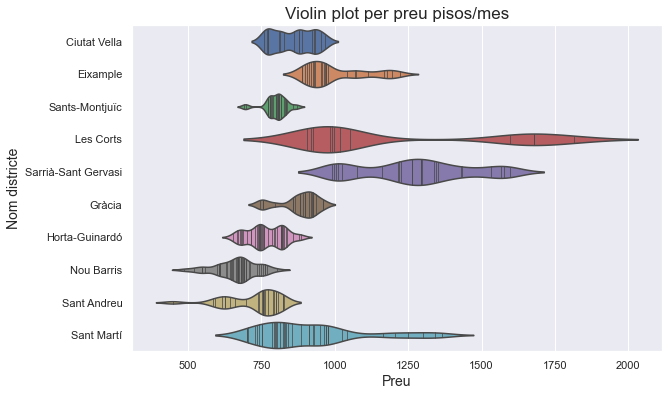

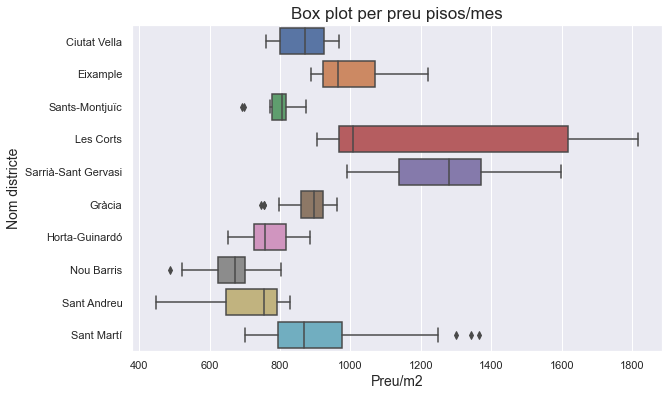

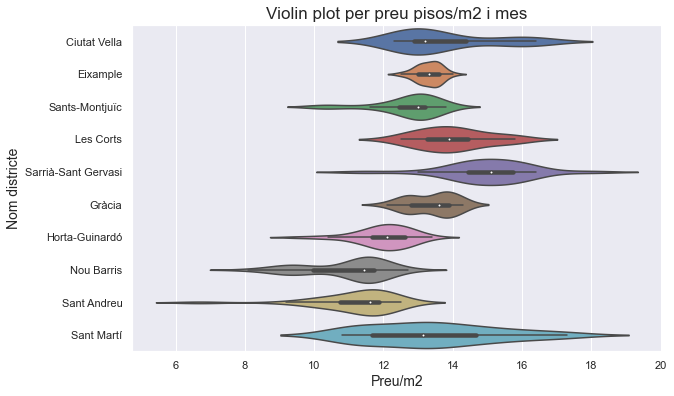

In [6]:
# plot violin chart 1
sns.set(style="darkgrid")
fig5 = plt.figure(5)
sns.violinplot(data=Rp, x='Preu',y='Nom_Districte',inner="stick",scale='width',bw=.3)
plt.title("Violin plot per preu pisos/mes", size=17)
plt.xlabel('Preu', fontsize=14)
plt.ylabel('Nom districte', fontsize=14)
plt.show()

fig6 = plt.figure(6)
sns.boxplot(data=Rp, x='Preu',y='Nom_Districte')
plt.title("Box plot per preu pisos/mes", size=17)
plt.xlabel('Preu/m2', fontsize=14)
plt.ylabel('Nom districte', fontsize=14)
plt.show()

# plot violin chart 2
fig7 = plt.figure(7)
sns.violinplot(data=Rp2, x='Preu/m2',y='Nom_Districte',scale='width')
#sns.boxplot(data=Rp2, x='Preu',y='Nom_Districte')
plt.title("Violin plot per preu pisos/m2 i mes", size=17)
plt.xlabel('Preu/m2', fontsize=14)
plt.ylabel('Nom districte', fontsize=14)
plt.show()

En aquestes figures s'analitza quins son els rangs de preus mensuals així com el preu mitjà per districte. Permet visualitzar quins són els districtes més cars per viure de lloguer així com el rang de preus de lloguer per mes que es pot trobar en aquells districtes.

### Dos variables numèriques

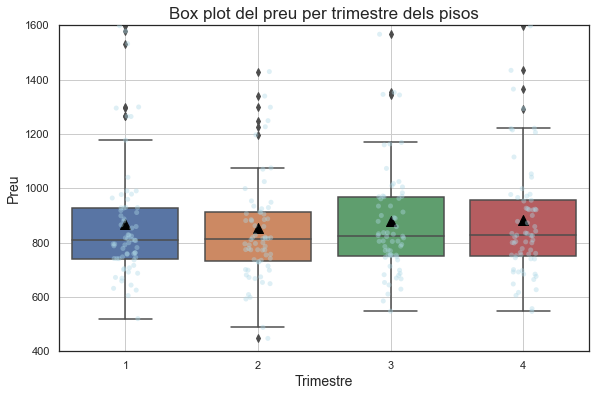

In [7]:
Xm=Rp[['Preu','Trimestre']].groupby(by='Trimestre').mean()
Xm.reset_index(inplace=True)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

fig8 = plt.figure(8)
sns.boxplot(data=Rp, x='Trimestre',y='Preu')
sns.stripplot(x='Trimestre', y='Preu', data=Rp, orient='v', color='lightblue', alpha= 0.4)
plt.scatter(Xm['Trimestre']-1,Xm['Preu'], s=100, marker='^',color='black')
plt.grid()
plt.title("Box plot del preu per trimestre dels pisos", size=17)
plt.ylim(bottom=400,top=1600)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Preu', fontsize=14)
plt.show()

Box plot on s'obtenen els rangs de preus de lloguer mensuals de tots els pisos de Barcelona dividits per trimestres. Podem apreciar que el rang i la mitjana de preus (marcada a partir d'ara amb el triangle negre) a Barcelona es manté prou constant amb un lleuger creixement cap als darrers trimestre del 2021.

### Tres variables

In [8]:
Pmt=Rp.groupby(['Nom_Districte','Trimestre'])['Preu'].mean()
Pmt=Pmt.to_frame()
Pmt=Pmt.rename(columns={'Preu':'Preu_mig'})
Pmt=Pmt.sort_values(by='Preu_mig',ascending=False)
Pmt.reset_index(inplace=True)
Pmt.index +=1
Pmt

,Nom_Districte,Trimestre,Preu_mig
1,Sarrià-Sant Gervasi,1,1320.566667
2,Sarrià-Sant Gervasi,4,1292.733333
3,Les Corts,3,1272.133333
4,Sarrià-Sant Gervasi,3,1239.666667
5,Sarrià-Sant Gervasi,2,1231.883333
6,Les Corts,4,1217.566667
7,Les Corts,2,1194.633333
8,Les Corts,1,1171.933333
9,Eixample,4,1026.433333
10,Eixample,3,1004.466667


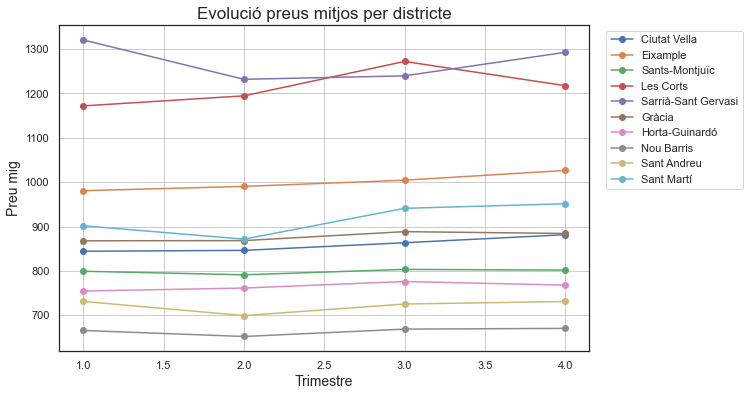

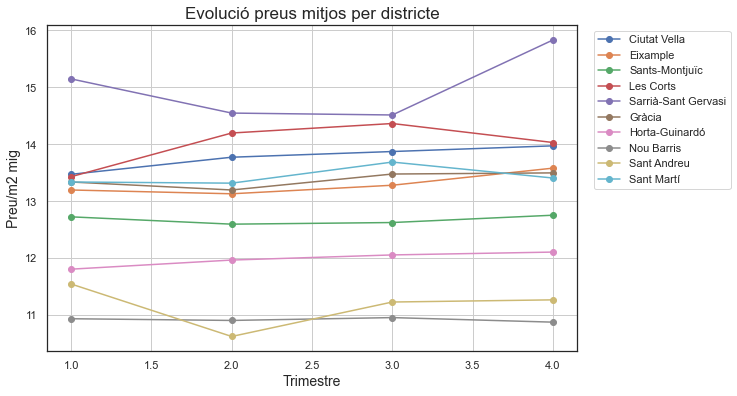

In [9]:
def preumt(x,y,df):
    for ii in x:
        Pmt=df[df['Nom_Districte']==ii].groupby(['Nom_Districte','Trimestre'])[y].mean()
        Pmt=Pmt.to_frame()
        Pmt=Pmt.rename(columns={y:'Preu_mig'})
        Pmt=Pmt.sort_values(by='Nom_Districte',ascending=False)
        Pmt.reset_index(inplace=True)
        Pmt.index +=1
        
        plt.title('Evolució preus mitjos per districte', fontsize=17)
        plt.rcParams["figure.figsize"] = (9.5,6)
        plt.plot(Pmt['Trimestre'],Pmt['Preu_mig'], '-o')
    return

fig9 = plt.figure(9)
preumt(Rp['Nom_Districte'].unique(),'Preu',Rp)
plt.grid()
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Preu mig', fontsize=14)
plt.legend(Rp['Nom_Districte'].unique(),loc='upper right',facecolor='white',bbox_to_anchor=(1.3, 1))
plt.show()

fig10 = plt.figure(10)
preumt(Rp2['Nom_Districte'].unique(),'Preu/m2',Rp2)
plt.grid()
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Preu/m2 mig', fontsize=14)
plt.legend(Rp2['Nom_Districte'].unique(),loc='upper right',facecolor='white',bbox_to_anchor=(1.3, 1))
plt.show()

Gràfics amb la evolució de preus a través dels trimestres del 2021 per detectar tendències o patrons. Es pot observar com en la majoria de districtes, al llarg de l'any, el preu de lloguer ha augmentat lleugerament respecte a l'inicial a principis d'any.

### Exercici 2

Exporta els gràfics com imatges o com HTML.

In [10]:
fig1.savefig('categ_1.png')
fig2.savefig('categ_2.png')
fig3.savefig('numer_1.png')
fig4.savefig('numer_2.png')
fig5.savefig('preu_dist_1.png')
fig6.savefig('preu_dist_2.png')
fig7.savefig('preu_dist_3.png')
fig8.savefig('preu_trim_1.png')
fig9.savefig('evol_preu_dist_1.png')
fig10.savefig('evol_preu_dist_2.png')

En l'apartat 3 s'inclouen figures que no es guarden en format .png però es podria fer perfectament seguint l'estructura que està adalt.

### Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant.



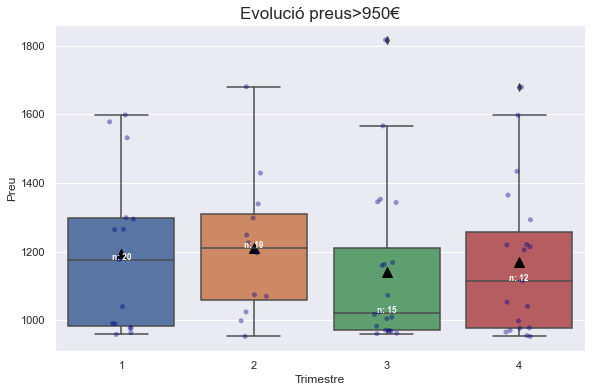

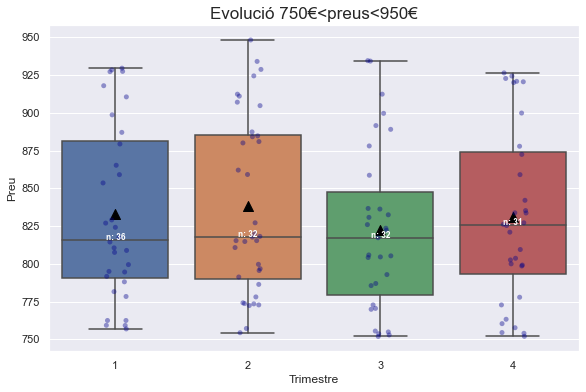

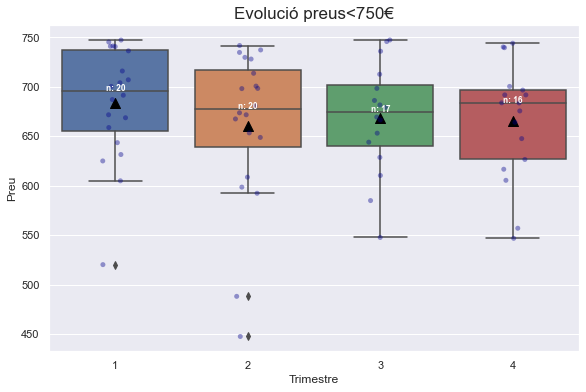

In [11]:
x=(Rp['Preu']>950)
Xm=Rp[x][['Preu','Trimestre']].groupby(by='Trimestre').mean()
Xm.reset_index(inplace=True)

sns.set(style="darkgrid")
figure11= plt.figure(11)
plt.title('Evolució preus>950€', fontsize=17)
ax=sns.boxplot(data=Rp[x], x='Trimestre',y='Preu')
sns.stripplot(x='Trimestre', y='Preu',data=Rp[x], orient='v', color='darkblue', alpha= 0.4)
plt.scatter(Xm['Trimestre']-1,Xm['Preu'], s=100, marker='^',color='black')


medians = Rp[x].groupby(['Trimestre'])['Preu'].median().values
nobs = Rp.Trimestre[x].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')

    
    
x=(Rp['Preu']>750) & (Rp['Preu']<950)
Xm=Rp[x][['Preu','Trimestre']].groupby(by='Trimestre').mean()
Xm.reset_index(inplace=True)


sns.set(style="darkgrid")
figure12= plt.figure(12)
plt.title('Evolució 750€<preus<950€', fontsize=17)
ax= sns.boxplot(data=Rp[x], x='Trimestre',y='Preu')
sns.stripplot(x='Trimestre', y='Preu',data=Rp[x], orient='v', color='darkblue', alpha= 0.4)
plt.scatter(Xm['Trimestre']-1,Xm['Preu'], s=100, marker='^',color='black')


medians = Rp[x].groupby(['Trimestre'])['Preu'].median().values
nobs = Rp.Trimestre[x].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')
    
    
x=(Rp['Preu']<750)
Xm=Rp[x][['Preu','Trimestre']].groupby(by='Trimestre').mean()
Xm.reset_index(inplace=True)


sns.set(style="darkgrid")
figure13= plt.figure(13)
plt.title('Evolució preus<750€', fontsize=17)
ax= sns.boxplot(data=Rp[x], x='Trimestre',y='Preu')
sns.stripplot(x='Trimestre', y='Preu',data=Rp[x], orient='v', color='darkblue', alpha= 0.4)
plt.scatter(Xm['Trimestre']-1,Xm['Preu'], s=100, marker='^',color='black')


medians = Rp[x].groupby(['Trimestre'])['Preu'].median().values
nobs = Rp.Trimestre[x].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')

Aquestes darreres gràfiques representen l'evolució temporal dels diferents pisos fragmentats en rangs de preu. Està dividit en pisos de menys de 750€ mensuals de lloguer, entre 750€ i 950€ (on estàn la mediana 816€ i mitjana aproximada 870€) i a partir de 950€. Així podem veure el comportament de cada segment de pisos segons el seu preu de lloguer. Veiem com els pisos de menys de 750€ han disminuït el seu preu de lloguer mensual fins a l'últim trimestre de l'any on han augmentat lleugerament respecte al trimestre anterior. Una situació similar es dona per els pisos de més de 950€ i per als que estàn en uns valors entre mig, es segueix la mateixa tendència en general.

<ipython-input-12-17ccb7e1acf0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rp['Preu_mig'] = Rp['Nom_Districte'].map(price_mean_serie)


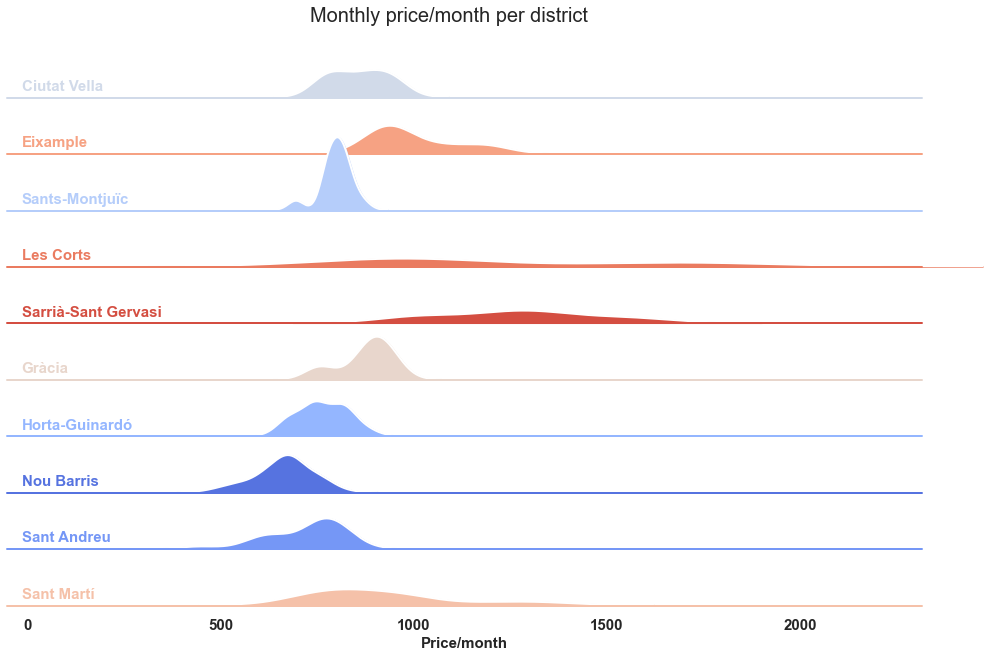

In [12]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

price_mean_serie = Rp.groupby('Nom_Districte')['Preu'].mean()
Rp['Preu_mig'] = Rp['Nom_Districte'].map(price_mean_serie)
Nom_Districte=pd.unique(Rp['Nom_Districte'])

# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=len(Nom_Districte))

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(Rp, row='Nom_Districte', hue='Preu_mig', aspect=15, height=0.9, palette=pal)

# then we add the densities kdeplots for each district
g.map(sns.kdeplot, 'Preu',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Preu', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=-0.0001,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.001, Nom_Districte[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlim([pmin['Preu'].iloc[0]-500, pmax['Preu'].iloc[0]+500])
plt.xlabel('Price/month', fontweight='bold', fontsize=15)
g.fig.suptitle('Monthly price/month per district',
               fontsize=20,
               fontweight=20)

plt.show()

Gràfica molt visual dels preus per mes dels diferents districtes de Barcelona amb una funció de distribució que marca la densitat de pisos per cada preu.